# The many faces of breast cancer
> Breast cancer is cancer that forms in the cells of the breasts.
After skin cancer, breast cancer is the most common cancer diagnosed in women in the United States. Breast cancer can occur in both men and women, but it's far more common in women. 

![](https://brand.roche.com/dam/jcr:03a744de-7d1a-409f-bc34-87362b3de088/en/CONSIDER_ILLUSTRATION_WHEN.2018-05-17-15-52-32.jpg)

# Description:
> Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

# Attributes:

* **ID**
* **Diagnosis** - The diagnosis of breast tissues (M = malignant, B = benighn)
* **Radius_mean** - mean of distances from center to points on the perimeter
* **Texture_mean** - standard deviation of gray-scale values
* **Perimeter_mean** - mean size of the core tumor
* **Area_mean**
* **Smoothness_mean** - mean of local variation in radius lengths
* **Compactness_mean** - mean of perimeter^2 / area -1.0
* **Concavity_mean** - mean of severity of concave portions of the contour
* **Concave points_mean** - mean for number concave portions of the contour
* **Symmetry_mean**
* **Fractal_dimension_mean** - mean for "coastline approximation" - 1
* **Radius_se** - standard error for the mean of distances from center to points on the perimeter
* **Texture_se** - standard error for standard deviation of gray-scale values
* **perimeter_se**
* **area_se**
* **Smoothness_se** - standard error for local variation in radius lengths
* **Compactness_se** - standard error for perimeter^2 / area - 1.0
* **Concavity_se** -standard error for severity of concave portions of the contour
* **concave points_se** - standard error for number of concave portions of the contour
* **symmetry_se**
* **fractal_dimension_se** - standard error for "coastline approximation" - 1
* **Radius_worst** -"worst" or largest mean value for mean of distances from center to points on the perimeter
* **texture_worst** -"worst" or largest mean value for standard deviation of gray-scale values
* **perimeter_worst**
* **area_worst**
* **smoothness_worst** - "worst" or largest mean value for local variation in radius lengths
* **compactness_worst** - "worst" or largest mean value for perimeter^2 / area - 1.0
* **concavity_worst** - "worst" or largest mean value for severity of concave portions of the contour
* **concave points_worst** - "worst" or largest mean value for number of concave portions of the contour
* **symmetry_worst**
* **fractal_dimension_worst** - "worst" or largest mean value for "coastline approximation" - 1

# Problem:
Cancer is a leading cause of death worldwide, accounting for an estimated 9.6 million deaths in 2018. The most common cancers are:
* Lung (2.09 million cases)
* Breast (2.09 million cases)
* Colorectal (1.80 million cases)
* Prostate (1.28 million cases)
* Skin cancer (non-melanoma) (1.04 million cases)
* Stomach (1.03 million cases)

The most common causes of cancer death are cancers of:
* Lung (1.76 million deaths)
* Colorectal (862 000 deaths)
* Stomach (783 000 deaths)
* Liver (782 000 deaths)
* Breast (627 000 deaths)


In [1]:
import os
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly 
import warnings
warnings.filterwarnings('ignore')


from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Binarizer, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
%matplotlib inline
sns.set(style='whitegrid')
plt.style.use('seaborn-darkgrid')

df = pd.read_csv('../input/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Dimensions of data
 Our dataset have 569 rows and 33 columns
* Too many rows and algorithms may take too long to train. Too few and perhaps you do
not have enough data to train the algorithms.
* Too many features and some algorithms can be distracted or suffer poor performance due
to the curse of dimensionality.

In [2]:
print('Dataset size:', df.shape)
print('---'*48)
print('Dataset columns:',df.columns)

Dataset size: (569, 33)
------------------------------------------------------------------------------------------------------------------------------------------------
Dataset columns: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


# Checking the data type of each attribute
> Most of our attributes are floating points with 1 object which is the diagnosis

In [3]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

# Checking for missing data
> We can see that we don't have any missing data or N/A values except for Unnamed: 32 columns which is not the part of our data so we will remove it.

In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
lst = ['id', 'Unnamed: 32']
df.drop(lst,axis=1, inplace=True)

# Statistical Summary

In [6]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Checking if we have a balance dataset


B    357
M    212
Name: diagnosis, dtype: int64


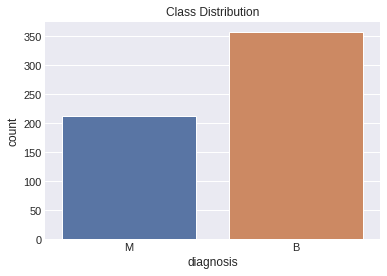

In [7]:
diagnosis = df.diagnosis.value_counts()
ax = sns.countplot(x='diagnosis', data=df)
plt.title('Class Distribution');
print(diagnosis)

# Correlation Between Attributes

In [8]:
corr = df.corr(method='pearson')
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


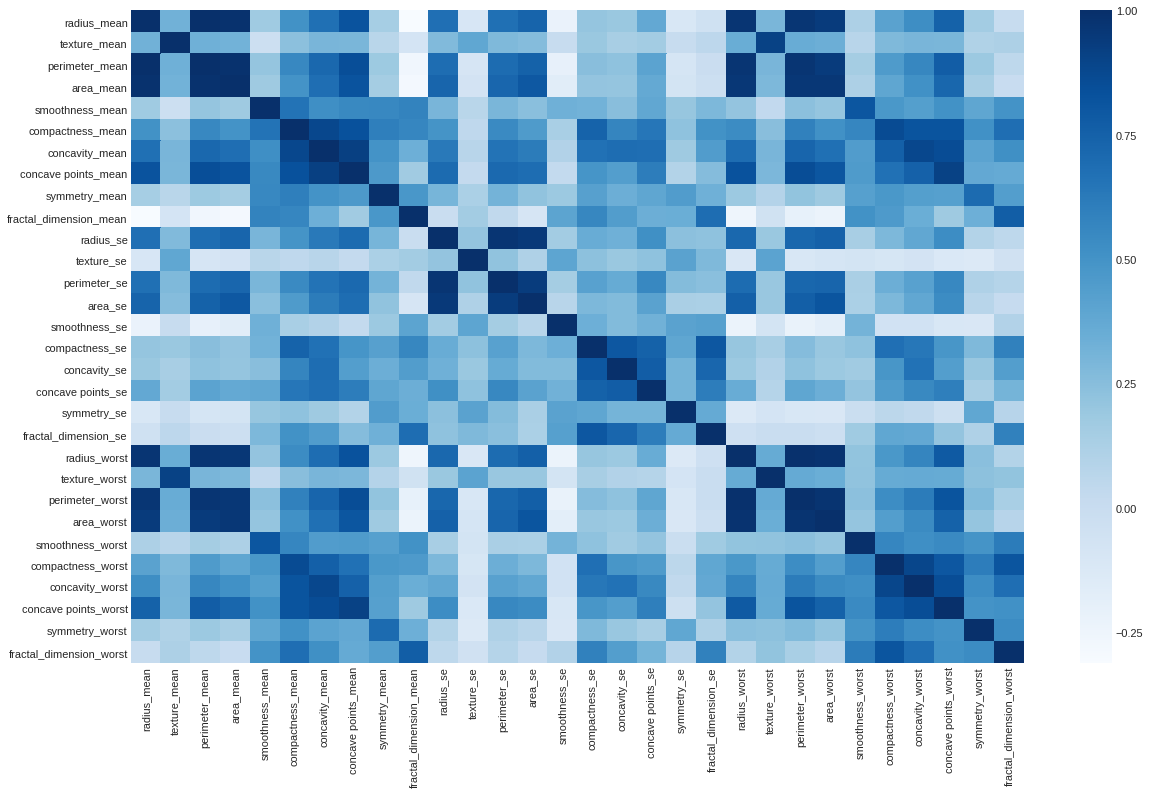

In [9]:
f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corr, fmt="f",cmap=plt.cm.Blues);

# Skew of Univariate Distributions

In [10]:
df.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

# Univariate Plots
>  Univariate plots to better understand each attribute.

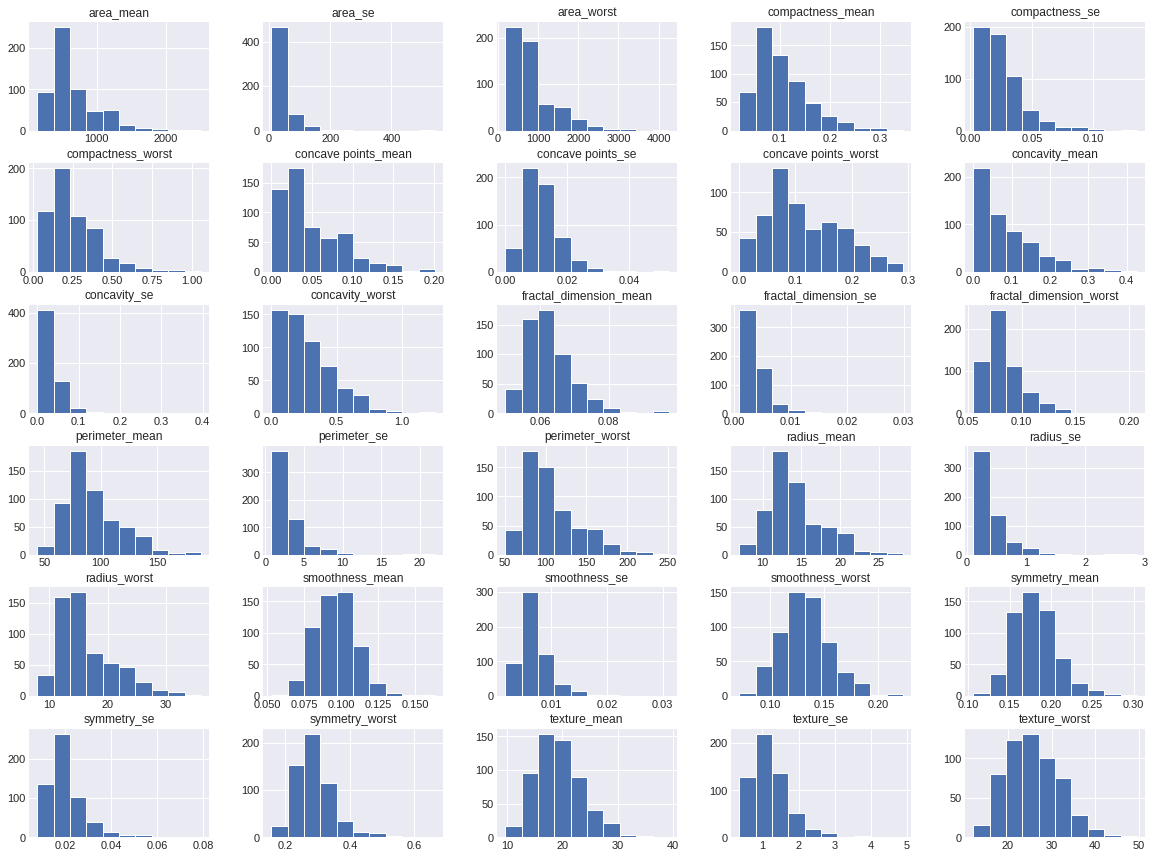

In [11]:
df.hist(figsize=(20,15));

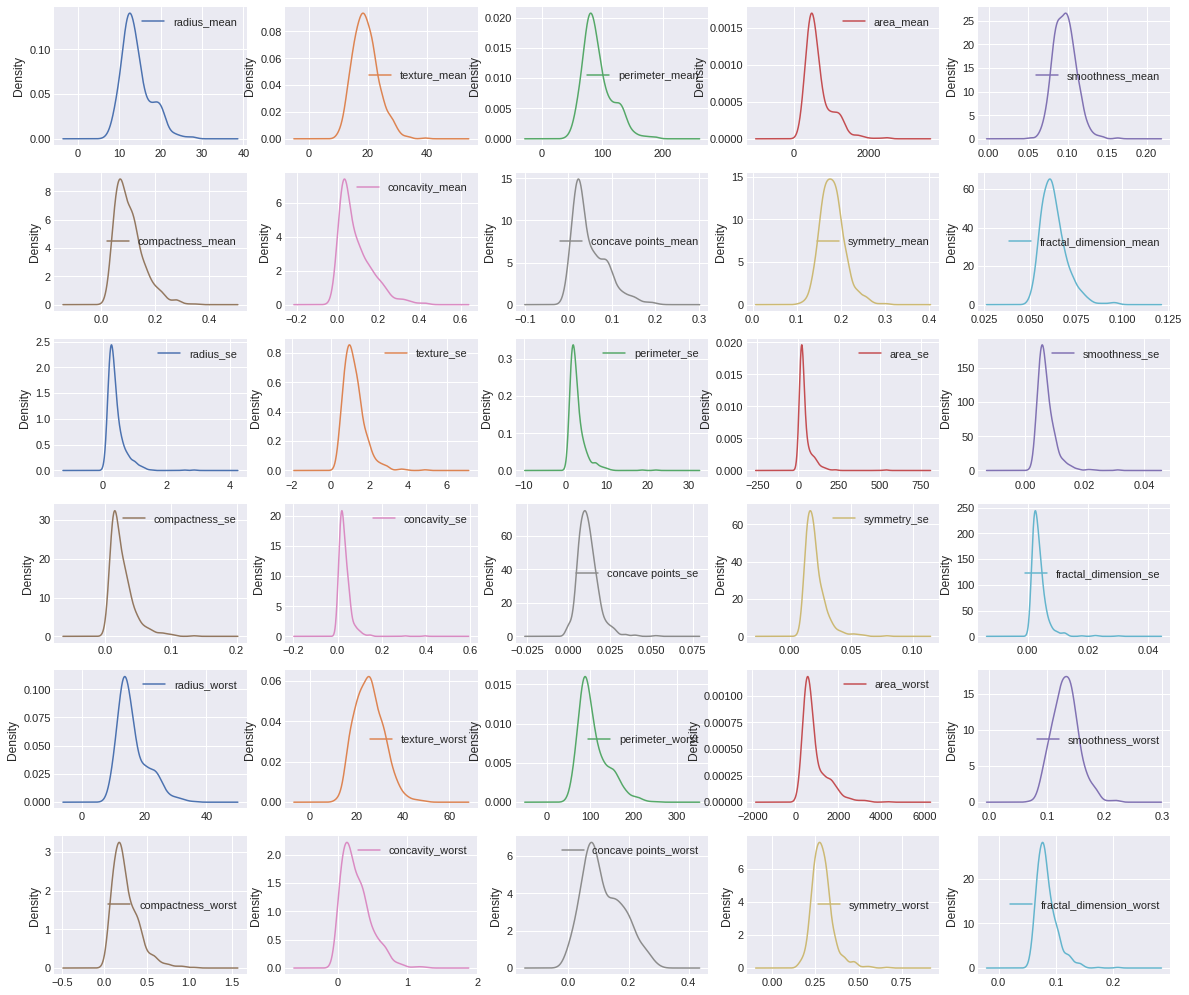

In [12]:
df.plot(kind= 'density' , subplots=True, layout=(10,5), sharex=False, figsize=(20,30));

# Splitting our data to training and testing set
> We will split our data to training set(70%), testing set(30%).  We need to split our data for model evaluation to know how good the model is.

In [13]:
X = df.drop('diagnosis',axis=1)
y = df.diagnosis


X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   random_state=0)
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (398, 30)
X_test:  (171, 30)
y_train:  (398,)
y_test:  (171,)


# Build Models


In [14]:
models = []
models.append(( ' LR ' , LogisticRegression()))
models.append(( ' LDA ' , LinearDiscriminantAnalysis()))
models.append(( ' KNN ' , KNeighborsClassifier()))
models.append(( ' RF ' , RandomForestClassifier()))
models.append(( ' NB ' , GaussianNB()))
models.append(( ' SVM ' , SVC()))

results = []
names = []

for name, model in models:
    Kfold = KFold(n_splits=10, random_state=0)
    cv_results = cross_val_score(model, X_train, y_train, cv=Kfold, scoring= 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std());
    print(msg)

 LR : 0.947372 (0.037739)
 LDA : 0.952308 (0.030482)
 KNN : 0.922115 (0.036213)
 RF : 0.957372 (0.025166)
 NB : 0.942244 (0.025183)
 SVM : 0.625449 (0.065149)


# Data Pre-processing
* **Standardize** - Standardization is a useful technique to transform attributes with a Gaussian distribution and
differing means and standard deviations to a standard Gaussian distribution with a mean of
0 and a standard deviation of 1
* **Normalize** - Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called
a unit norm or a vector with the length of 1 in linear algebra).
* **Binarize** - All values above the threshold are
marked 1 and all equal to or below are marked as 0.

# StandardScaler

In [15]:

pipelines = []
pipelines.append(( ' ScaledLR ' , Pipeline([( 'Scaler' , StandardScaler()),( ' LR ' ,
LogisticRegression())])))
pipelines.append(( ' ScaledLDA ' , Pipeline([( 'Scaler' , StandardScaler()),( ' LDA ' ,
LinearDiscriminantAnalysis())])))
pipelines.append(( ' ScaledKNN ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' KNN ' ,
KNeighborsClassifier())])))
pipelines.append(( ' ScaledRF ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' RandomForest ' ,
RandomForestClassifier())])))
pipelines.append(( ' ScaledNB ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' NB ' ,
GaussianNB())])))
pipelines.append(( ' ScaledSVM ' , Pipeline([( ' Scaler' , StandardScaler()),( ' SVM ' , SVC())])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=0)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 ScaledLR : 0.982436 (0.025145)
 ScaledLDA : 0.952308 (0.030482)
 ScaledKNN : 0.962308 (0.025904)
 ScaledRF : 0.944808 (0.021680)
 ScaledNB : 0.937244 (0.032420)
 ScaledSVM : 0.980000 (0.026926)


# Normalizer

In [16]:

pipelines = []
pipelines.append(( ' NormLR ' , Pipeline([( 'Normalizer' , Normalizer()),( ' LR ' ,
LogisticRegression())])))
pipelines.append(( ' NormLDA ' , Pipeline([( 'Normalizer' , Normalizer()),( ' LDA ' ,
LinearDiscriminantAnalysis())])))
pipelines.append(( ' NormLKNN ' , Pipeline([( ' Normalizer ' , Normalizer()),( ' KNN ' ,
KNeighborsClassifier())])))
pipelines.append(( ' NormRandomForest ' , Pipeline([( ' Normalizer ' , Normalizer()),( ' RandomForest ' ,
RandomForestClassifier())])))
pipelines.append(( ' NormNB ' , Pipeline([( ' Normalizer ' , Normalizer()),( ' NB ' ,
GaussianNB())])))
pipelines.append(( ' NormSVM ' , Pipeline([( ' Normalizer' , Normalizer()),( ' SVM ' , SVC())])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=0)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 NormLR : 0.748462 (0.078372)
 NormLDA : 0.962308 (0.023087)
 NormLKNN : 0.911987 (0.042445)
 NormRandomForest : 0.952372 (0.039459)
 NormNB : 0.826538 (0.059920)
 NormSVM : 0.625449 (0.065149)


# Binarizer

In [17]:
pipelines = []
pipelines.append(( ' BinLR ' , Pipeline([( 'Binarizer' , Binarizer(threshold=0.0)),( ' LR ' ,
LogisticRegression())])))
pipelines.append(( ' BinLDA ' , Pipeline([( 'Binarizer' , Binarizer(threshold=0.0)),( ' LDA ' ,
LinearDiscriminantAnalysis())])))
pipelines.append(( ' BinKNN ' , Pipeline([( 'Binarizer ' , Binarizer(threshold=0.0)),( ' KNN ' ,
KNeighborsClassifier())])))
pipelines.append(( ' BinRandomForest ' , Pipeline([( 'Binarizer ' , Binarizer(threshold=0.0)),( ' RandomForest ' ,
RandomForestClassifier())])))
pipelines.append(( ' BinNB ' , Pipeline([( ' Binarizer ' , Binarizer(threshold=0.0)),( ' NB ' ,
GaussianNB())])))
pipelines.append(( 'BinSVM ' , Pipeline([( ' Binarizer' , Binarizer(threshold=0.0)),( ' SVM ' , SVC())])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=0)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 BinLR : 0.625449 (0.065149)
 BinLDA : 0.625449 (0.065149)
 BinKNN : 0.625449 (0.065149)
 BinRandomForest : 0.625449 (0.065149)
 BinNB : 0.392244 (0.058291)
BinSVM : 0.625449 (0.065149)


![](https://i.imgur.com/RolHmcy.png)

### We can see that using data transforms will increase the accuracy of our model. The Logistic Regression algorithm was the most accurate model that we tested. Now we want to get an idea of the accuracy of the model on our testing set.  

In [18]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test =scaler.transform(X_test)
log = LogisticRegression().fit(X_train,y_train)

y_pred = log.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,y_pred))

Accuracy:  0.9766081871345029


# Metrics for Classification
* Accuracy
* Confusion Matrix
* Classification Report

# Confusion Matrix
> Confusion matrix shows the correct and incorrect predictions

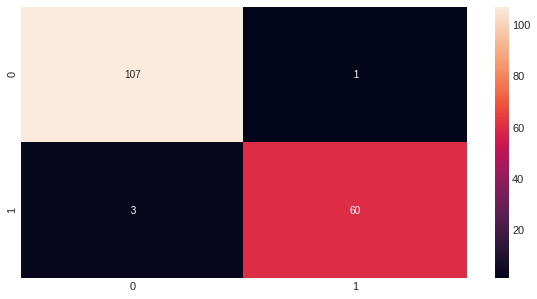

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='2.0f');

# Classification Report
> Classification accuracy is the number of correct predictions made as a ratio of all predictions
made

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.97      0.99      0.98       108
           M       0.98      0.95      0.97        63

   micro avg       0.98      0.98      0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



# Reference
* [WHO Cancer](https://www.who.int/news-room/fact-sheets/detail/cancer)
* [Metrics for Classification](https://medium.com/thalus-ai/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b)
* [Choosing the Right Metric for Evaluating Machine Learning Models ](https://medium.com/usf-msds/choosing-the-right-metric-for-evaluating-machine-learning-models-part-2-86d5649a5428)
* [Understand Classification Performance Metrics](https://becominghuman.ai/understand-classification-performance-metrics-cad56f2da3aa)
* [Architecting a Machine Learning Pipeline](https://towardsdatascience.com/architecting-a-machine-learning-pipeline-a847f094d1c7)
* [A Simple Example of Pipeline in Machine Learning with Scikit-learn](https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976)
* [Imbalanced Dataset](https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb)